In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
!wget --no-check-certificate \
 https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
 -O /tmp/rockpaperscissors.zip

--2021-08-09 15:00:34--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 404 The specified resource does not exist.
2021-08-09 15:00:34 ERROR 404: The specified resource does not exist..



In [ ]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'rps-cv-images')
val_dir = os.path.join(base_dir, 'rps-cv-images')

In [ ]:
import os
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'paper', 'rock', 'scissors']

In [ ]:
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

val_rock_dir = os.path.join(val_dir, 'rock')
val_paper_dir = os.path.join(val_dir, 'paper')
val_scissors_dir = os.path.join(val_dir, 'scissors')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.4 #membagi agar validation 40%
)

test_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.4 #membagi agar validation 40%
)

In [ ]:
train_gen = train_data.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=100, #nilai batch diatur ke 100
        subset='training',
        class_mode='categorical')
 
val_gen = test_data.flow_from_directory(
        val_dir, 
        target_size=(150, 150), 
        batch_size=100, #nilai batch diatur ke 100
        subset='validation',
        class_mode='categorical')

#class callback
class cb(tf.keras.callbacks.Callback): 
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi telah mencapai di atas 97%, training berhenti")
      self.model.stop_training = True #training akan berhenti ketika akurasi telah mencapai >= 97%

callbacks = cb()

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), #teknik dropout untuk mengurangi overfitting
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  #menggunakan softmax karena classes adalah multiclass
])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model.summary() #menampilkan summary model
model.compile(loss='categorical_crossentropy', #menggunakan categorical_crossentropy dikarenakan 3 classes
              optimizer=tf.optimizers.Adam(), 
              metrics=['accuracy'])



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
history = model.fit(
      train_gen,
      steps_per_epoch=13, #steps per epoch = jumlah images(1314) / batch_size(100)
      epochs=20, 
      validation_data=val_gen, 
      validation_steps=9, #validation step = jumlah image (874) / batch_size(100)
      verbose=2,
      callbacks=[callbacks],#memanggil class callback
      )

Epoch 1/20
13/13 - 70s - loss: 1.1156 - accuracy: 0.3847 - val_loss: 1.0680 - val_accuracy: 0.4142
Epoch 2/20
13/13 - 69s - loss: 1.0040 - accuracy: 0.5124 - val_loss: 0.8560 - val_accuracy: 0.6178
Epoch 3/20
13/13 - 69s - loss: 0.7987 - accuracy: 0.6647 - val_loss: 0.5883 - val_accuracy: 0.7780
Epoch 4/20
13/13 - 69s - loss: 0.6103 - accuracy: 0.7768 - val_loss: 0.4347 - val_accuracy: 0.8421
Epoch 5/20
13/13 - 69s - loss: 0.3517 - accuracy: 0.8740 - val_loss: 0.2742 - val_accuracy: 0.9027
Epoch 6/20
13/13 - 69s - loss: 0.3162 - accuracy: 0.8806 - val_loss: 0.2332 - val_accuracy: 0.9199
Epoch 7/20
13/13 - 69s - loss: 0.2542 - accuracy: 0.9102 - val_loss: 0.2182 - val_accuracy: 0.9279
Epoch 8/20
13/13 - 69s - loss: 0.2000 - accuracy: 0.9308 - val_loss: 0.1629 - val_accuracy: 0.9497
Epoch 9/20
13/13 - 69s - loss: 0.2088 - accuracy: 0.9242 - val_loss: 0.1547 - val_accuracy: 0.9565
Epoch 10/20
13/13 - 68s - loss: 0.1904 - accuracy: 0.9366 - val_loss: 0.1482 - val_accuracy: 0.9554
Epoch 11/

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


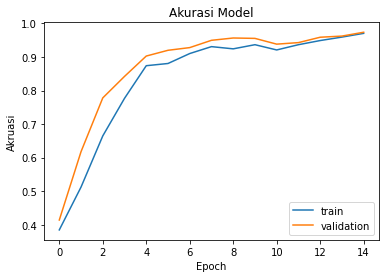

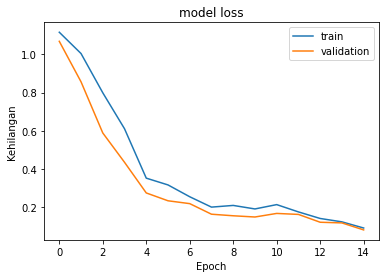

In [ ]:
import matplotlib.pyplot as plt
#menampilkan grafik menggunakan plot
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Akruasi')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Kehilangan')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Saving 1fKclJk4eBWOQSR1.png to 1fKclJk4eBWOQSR1 (1).png
1fKclJk4eBWOQSR1.png
kertas / paper


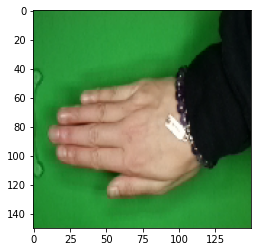

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) 

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('kertas / paper')
  elif classes[0,1]!=0:
    print('batu / rock')
  else:
    print('gunting / scissors')

Saving 2NmrcDGkc7FQuu12.png to 2NmrcDGkc7FQuu12.png
2NmrcDGkc7FQuu12.png
batu / rock


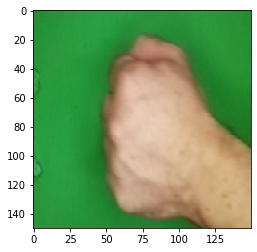

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) 

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('kertas / paper')
  elif classes[0,1]!=0:
    print('batu / rock')
  else:
    print('gunting / scissors')

Saving 1VRzspyXpQ6A2rKy.png to 1VRzspyXpQ6A2rKy.png
1VRzspyXpQ6A2rKy.png
gunting / scissors


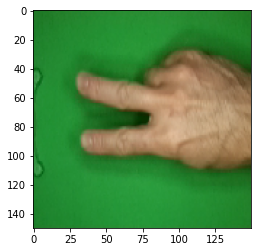

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) 

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('kertas / paper')
  elif classes[0,1]!=0:
    print('batu / rock')
  else:
    print('gunting / scissors')